# Evaluation procedure for SYNTHIA

In [6]:
import numpy as np
import cv2
import os


focal = 532.7403520000000

principal_point_x = 640

principal_point_y = 380

baseline = 0.8

## Load predicted disparities

In [7]:
predicted_disps = np.load("../data/output/run_19-03-02_13h:39m_resnet50_md_synthia/test/disparities.npy")

In [12]:
predicted_disps = predicted_disps[:295]

In [36]:
predicted_disps.max()

0.21802635

## Setup file paths

In [18]:
filenames_file = "../resources/filenames/synthia_spring_05.txt"
root_dir = "../data/synthia"

with open(filenames_file) as filenames:
    left_image_paths = sorted(
        os.path.join(root_dir, fname.split()[0]) for fname in filenames
    )

left_depth_paths = ["/".join([path if path != "RGB" else "Depth" for path in str.split(image_path, "/")]) for image_path in left_image_paths]

len(left_depth_paths)

295

## Load ground truth depth

In [33]:
img = cv2.imread(left_depth_paths[0], 0).astype(np.float32)

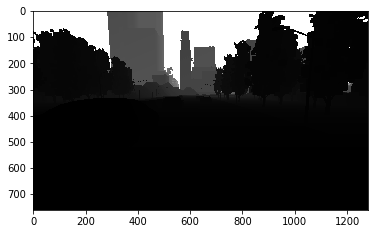

In [34]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")
plt.show()

## Convert predicted disparity to depth